In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols  
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('Auto_sales.csv')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [15]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [17]:
data.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [18]:
data_cleaned = data.dropna()

In [19]:
data['PRICEEACH'].fillna(data['PRICEEACH'].mean(), inplace=True)

In [20]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], format='%d/%m/%Y')

In [21]:
data_cleaned = data.drop_duplicates()

In [22]:
data['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [23]:
data['STATUS'] = data['STATUS'].replace({'Shipped ': 'Shipped'})

In [24]:
Q1 = data['QUANTITYORDERED'].quantile(0.25)
Q3 = data['QUANTITYORDERED'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
data_cleaned = data[(data['QUANTITYORDERED'] >= lower_bound) & (data['QUANTITYORDERED'] <= upper_bound)]

In [27]:
data_cleaned.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

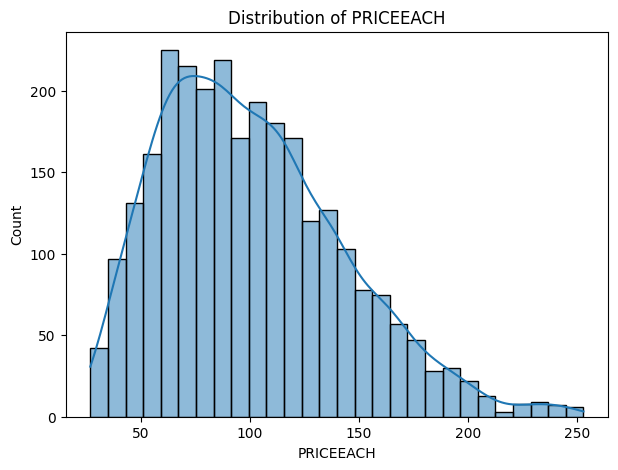

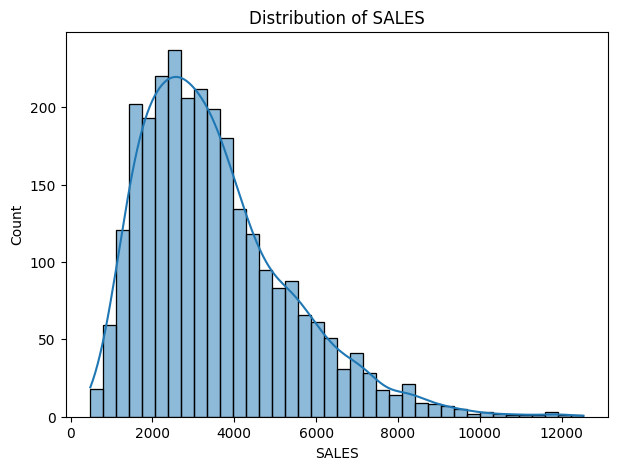

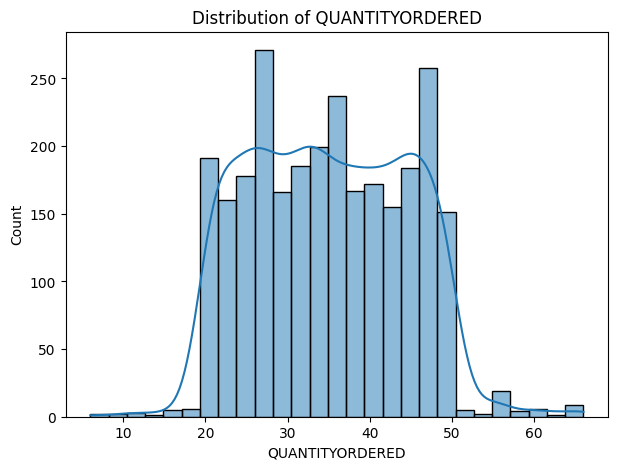

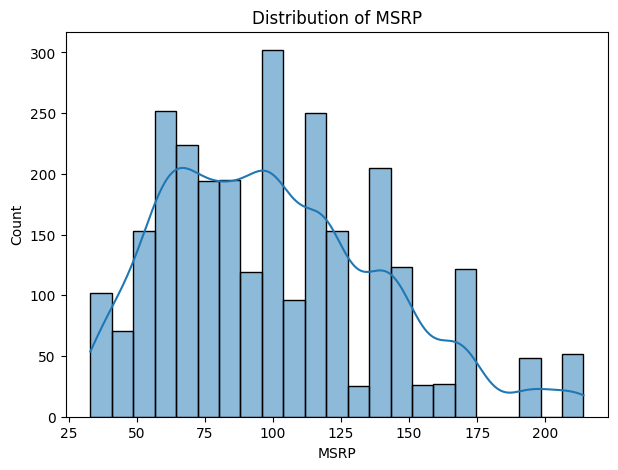

In [28]:
for column in ['PRICEEACH', 'SALES', 'QUANTITYORDERED', 'MSRP']:
    plt.figure(figsize=(7, 5))
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

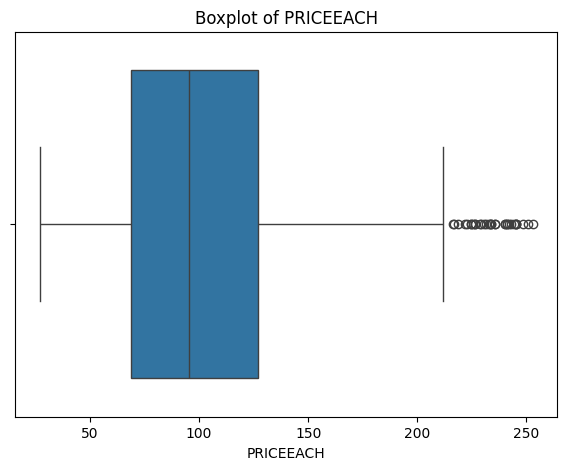

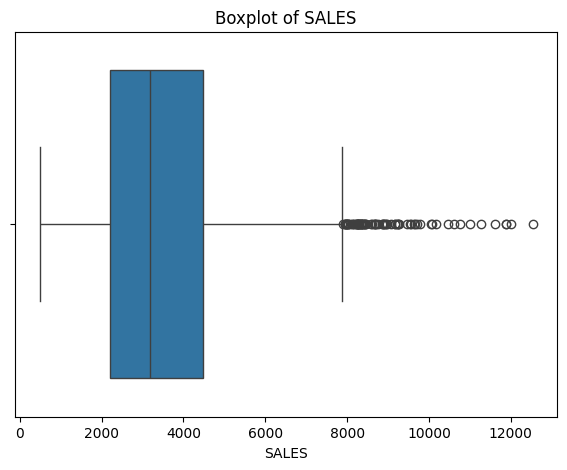

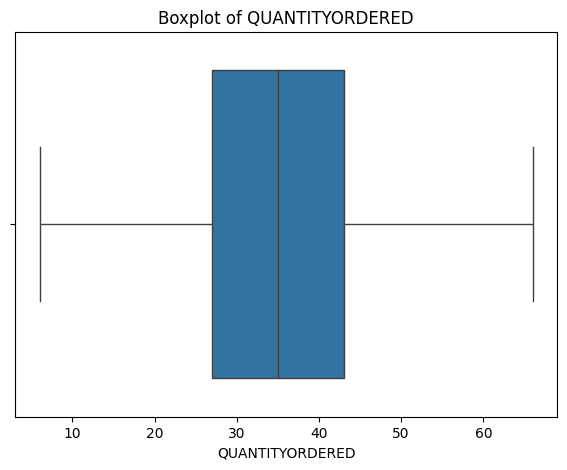

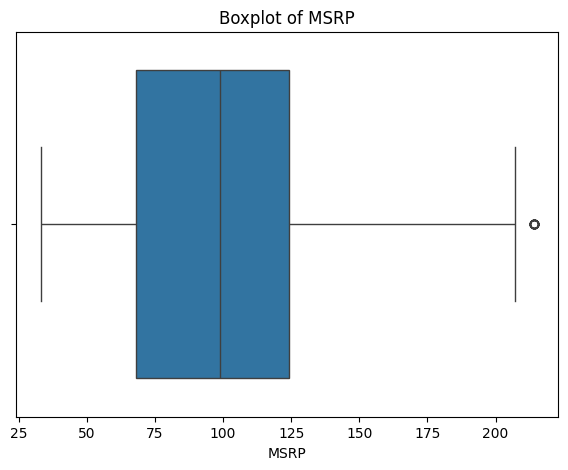

In [29]:
for column in ['PRICEEACH', 'SALES', 'QUANTITYORDERED', 'MSRP']:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

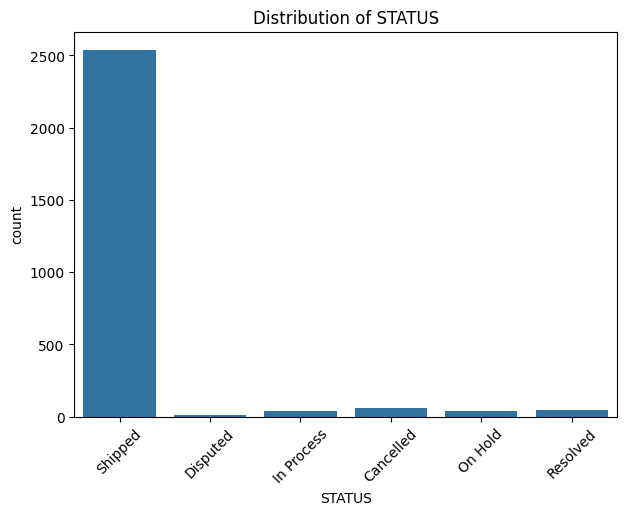

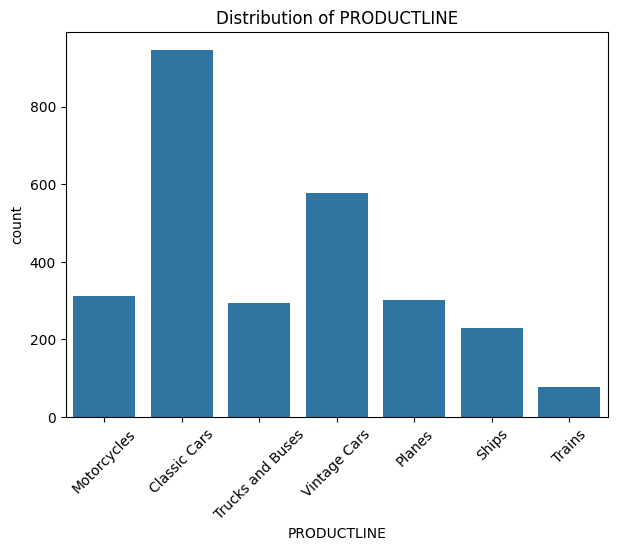

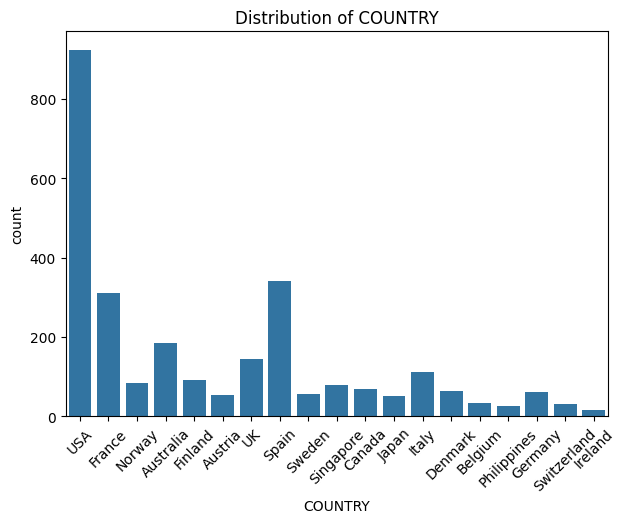

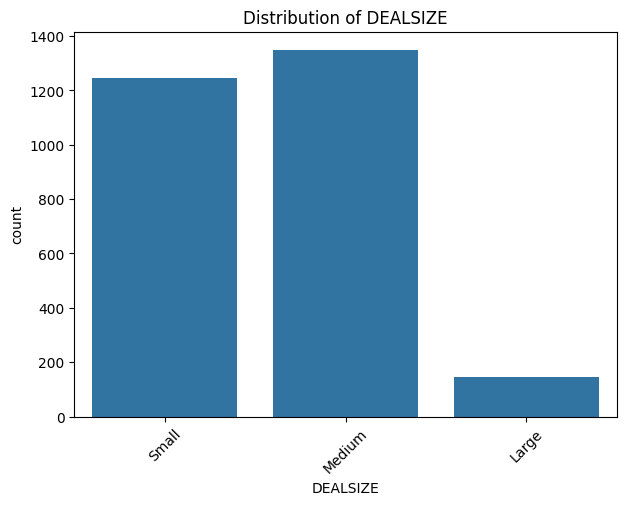

In [30]:
for column in ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=data_cleaned[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

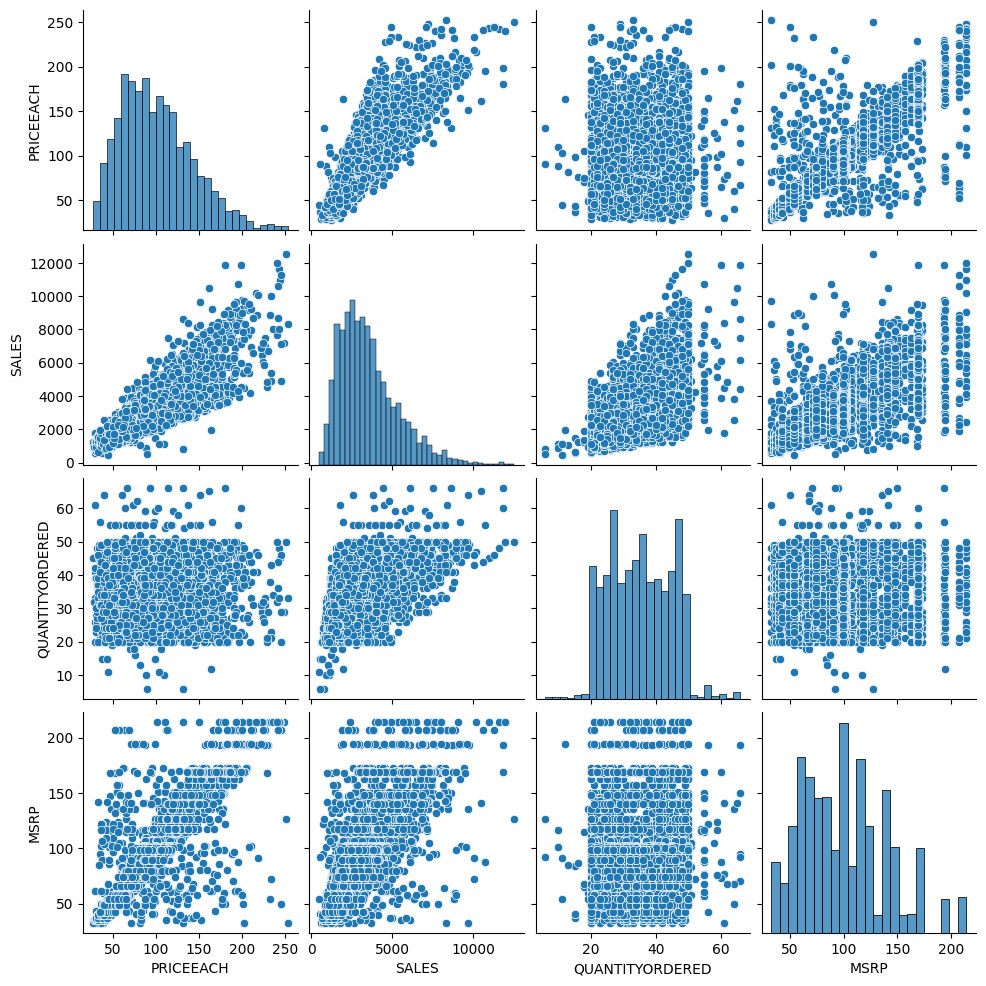

In [31]:
sns.pairplot(data_cleaned[['PRICEEACH', 'SALES', 'QUANTITYORDERED', 'MSRP']])
plt.show()

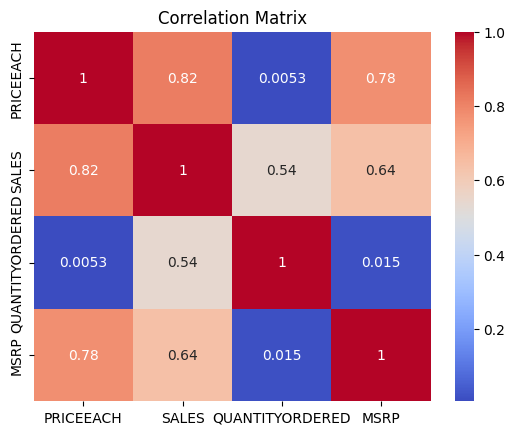

In [32]:
correlation_matrix = data_cleaned[['PRICEEACH', 'SALES', 'QUANTITYORDERED', 'MSRP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

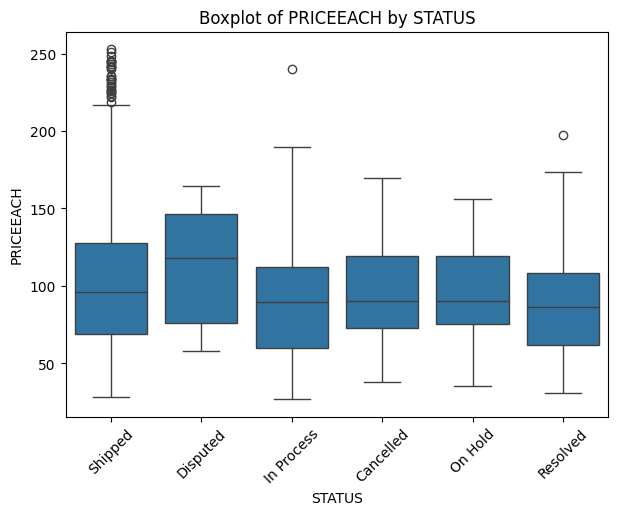

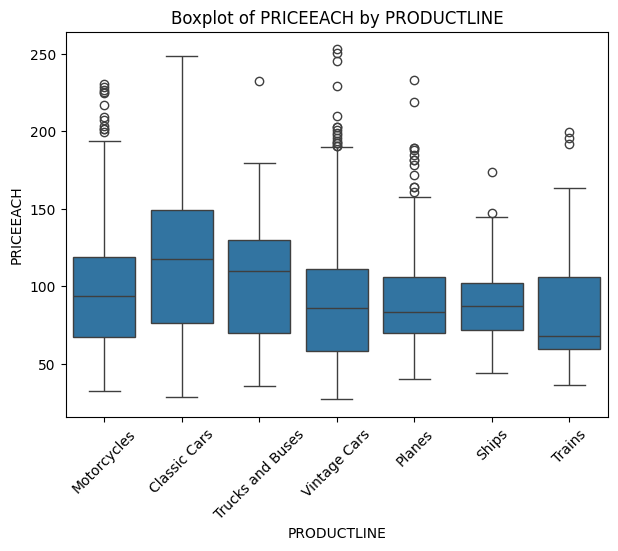

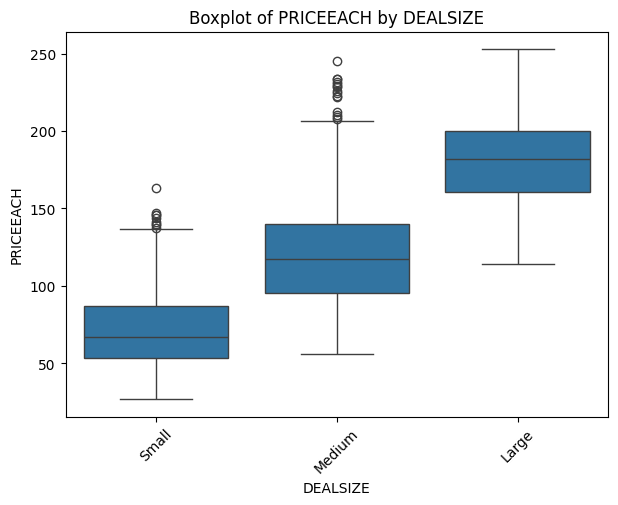

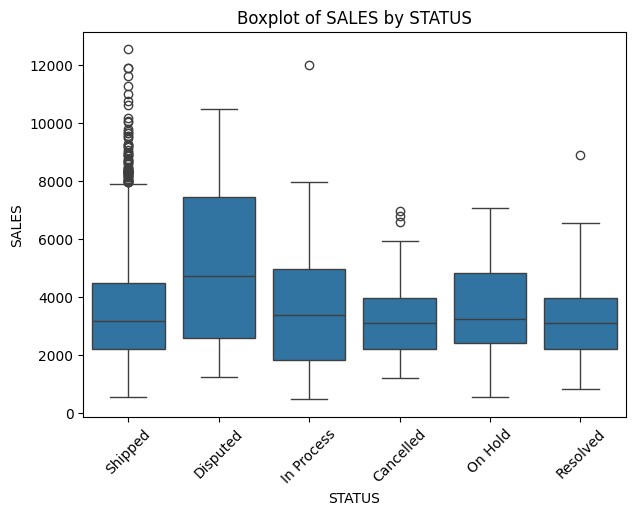

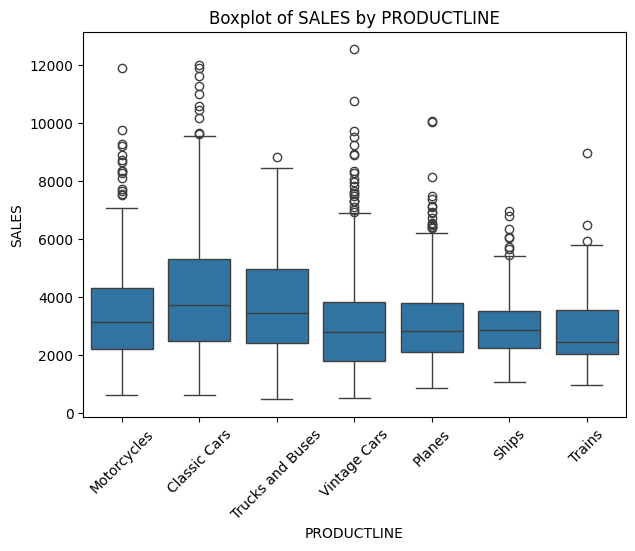

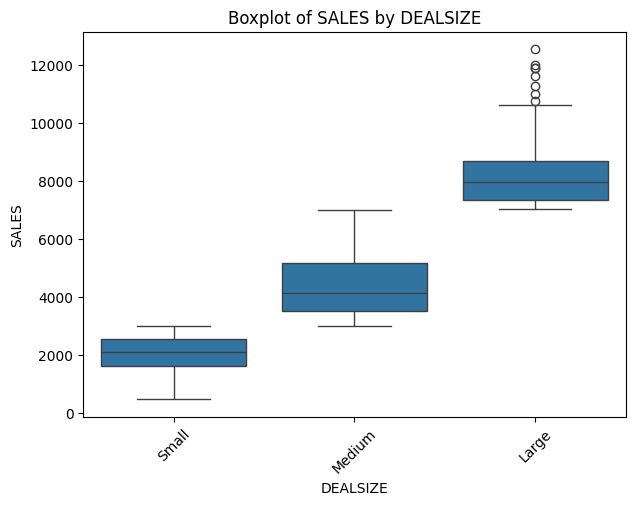

In [33]:
for num_col in ['PRICEEACH', 'SALES']:
    for cat_col in ['STATUS', 'PRODUCTLINE', 'DEALSIZE']:
        plt.figure(figsize=(7, 5))
        sns.boxplot(x=data_cleaned[cat_col], y=data_cleaned[num_col])
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

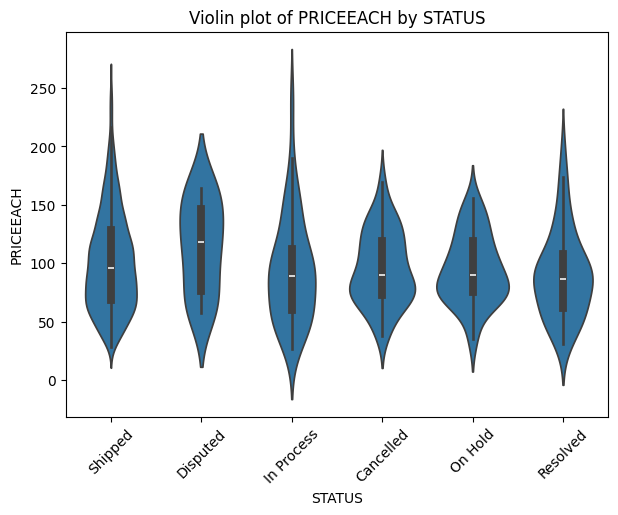

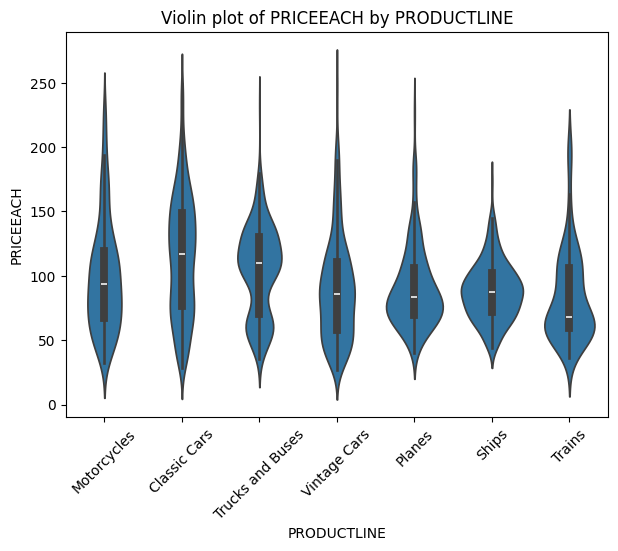

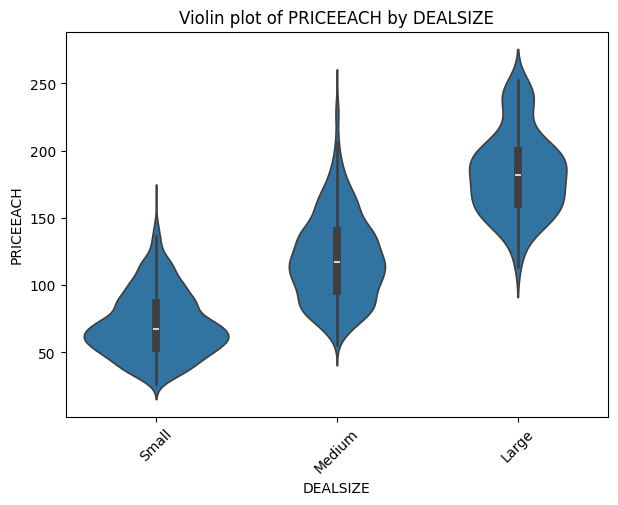

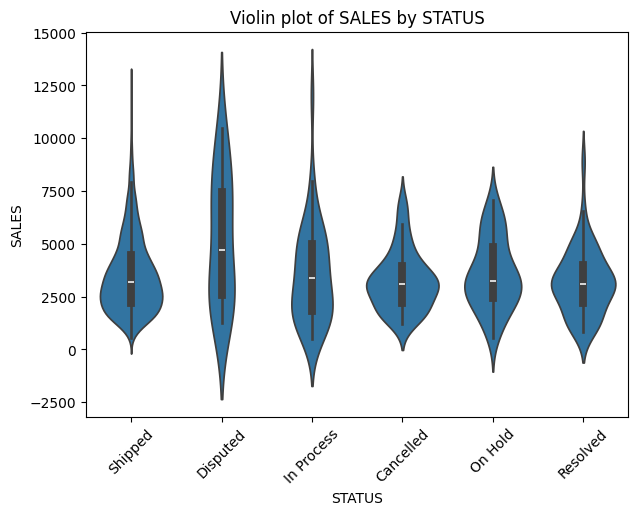

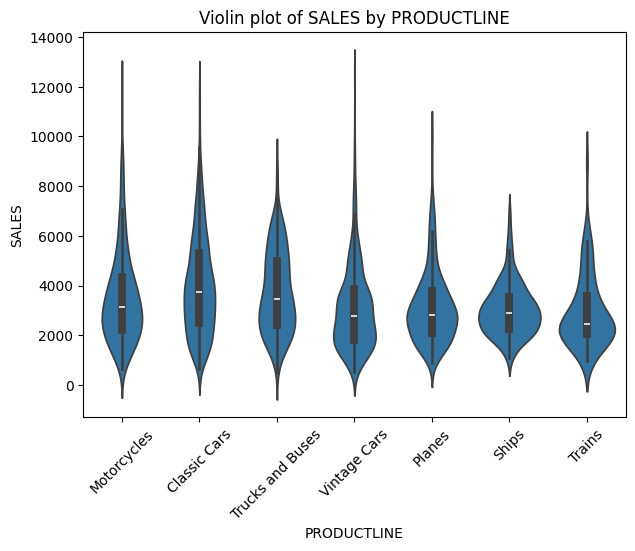

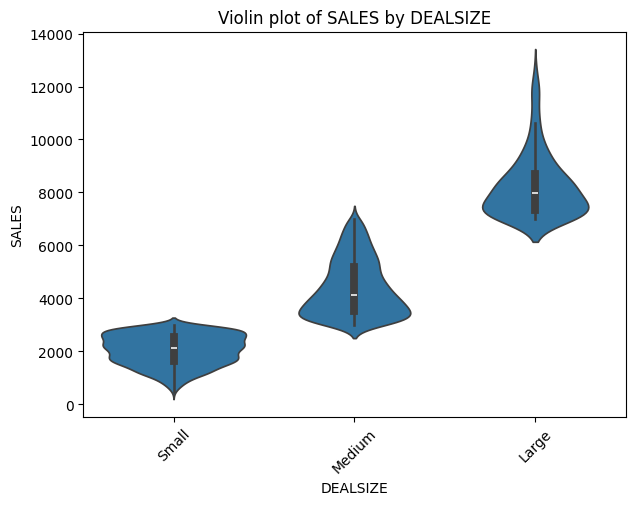

In [34]:
for num_col in ['PRICEEACH', 'SALES']:
    for cat_col in ['STATUS', 'PRODUCTLINE', 'DEALSIZE']:
        plt.figure(figsize=(7, 5))
        sns.violinplot(x=data_cleaned[cat_col], y=data_cleaned[num_col])
        plt.title(f'Violin plot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

In [35]:
population_mean = 3000  # Hypothetical population mean
sales_mean = np.mean(data_cleaned['SALES'])
sales_std = np.std(data_cleaned['SALES'], ddof=1)
z_score = (sales_mean - population_mean) / (sales_std / np.sqrt(len(data_cleaned['SALES'])))
print(f"Z-Score: {z_score}")

Z-Score: 15.497752896632079


In [36]:
p_value = stats.norm.sf(abs(z_score))*2 
print(f"P-Value: {p_value}")

P-Value: 3.592380743551186e-54


In [37]:
shipped = data_cleaned[data_cleaned['STATUS'] == 'Shipped']['SALES']
cancelled = data_cleaned[data_cleaned['STATUS'] == 'Cancelled']['SALES']
t_stat, p_val = stats.ttest_ind(shipped, cancelled)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: 1.2718589809965017, P-Value: 0.20353719598349027


In [38]:
contingency_table = pd.crosstab(data_cleaned['STATUS'], data_cleaned['DEALSIZE'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, P-Value: {p}")

Chi-Square Statistic: 33.79178879667114, P-Value: 0.00020030958945180187


In [39]:
anova_result = ols('SALES ~ C(DEALSIZE)', data=data_cleaned).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print(anova_table)

                   sum_sq      df            F  PR(>F)
C(DEALSIZE)  6.871720e+09     2.0  4460.828138     0.0
Residual     2.107347e+09  2736.0          NaN     NaN


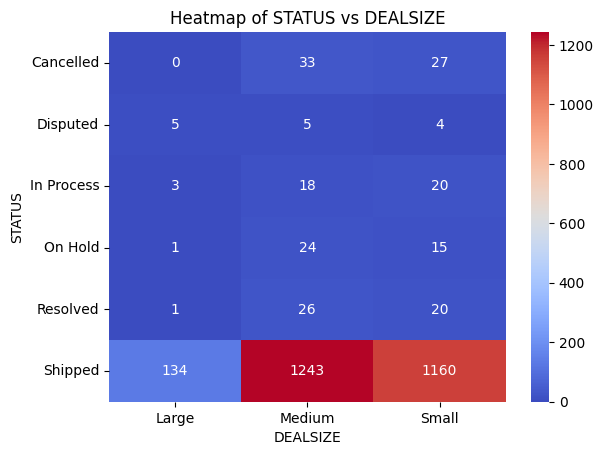

In [40]:
contingency_table = pd.crosstab(data_cleaned['STATUS'], data_cleaned['DEALSIZE'])
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of STATUS vs DEALSIZE')
plt.show()

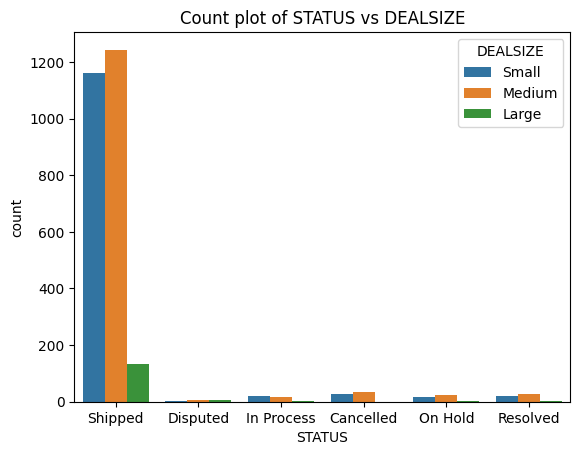

In [41]:
sns.countplot(x='STATUS', hue='DEALSIZE', data=data_cleaned)
plt.title('Count plot of STATUS vs DEALSIZE')
plt.show()

In [43]:
small = data_cleaned[data_cleaned['DEALSIZE'] == 'Small']['SALES']
medium = data_cleaned[data_cleaned['DEALSIZE'] == 'Medium']['SALES']
large = data_cleaned[data_cleaned['DEALSIZE'] == 'Large']['SALES']
kruskal_stat, kruskal_p = stats.kruskal(small, medium, large)
print(f"Kruskal-Wallis Statistic: {kruskal_stat}, P-Value: {kruskal_p}")

Kruskal-Wallis Statistic: 2152.735322734587, P-Value: 0.0


In [44]:
z_scores_sales = np.abs(stats.zscore(data_cleaned['SALES']))
outliers_sales = data_cleaned[z_scores_sales > 3] 
print(f"Number of outliers in SALES: {len(outliers_sales)}")

Number of outliers in SALES: 28


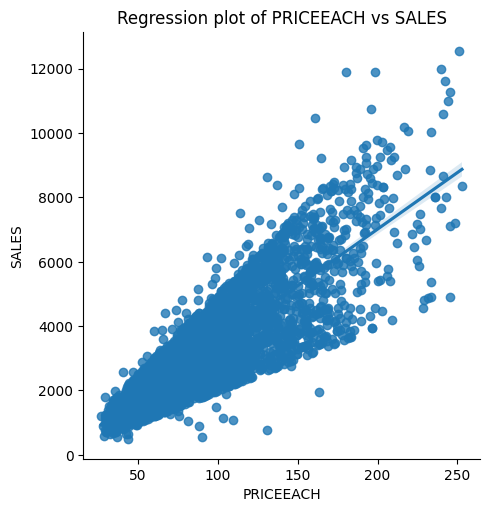

In [45]:
sns.lmplot(x='PRICEEACH', y='SALES', data=data_cleaned)
plt.title('Regression plot of PRICEEACH vs SALES')
plt.show()

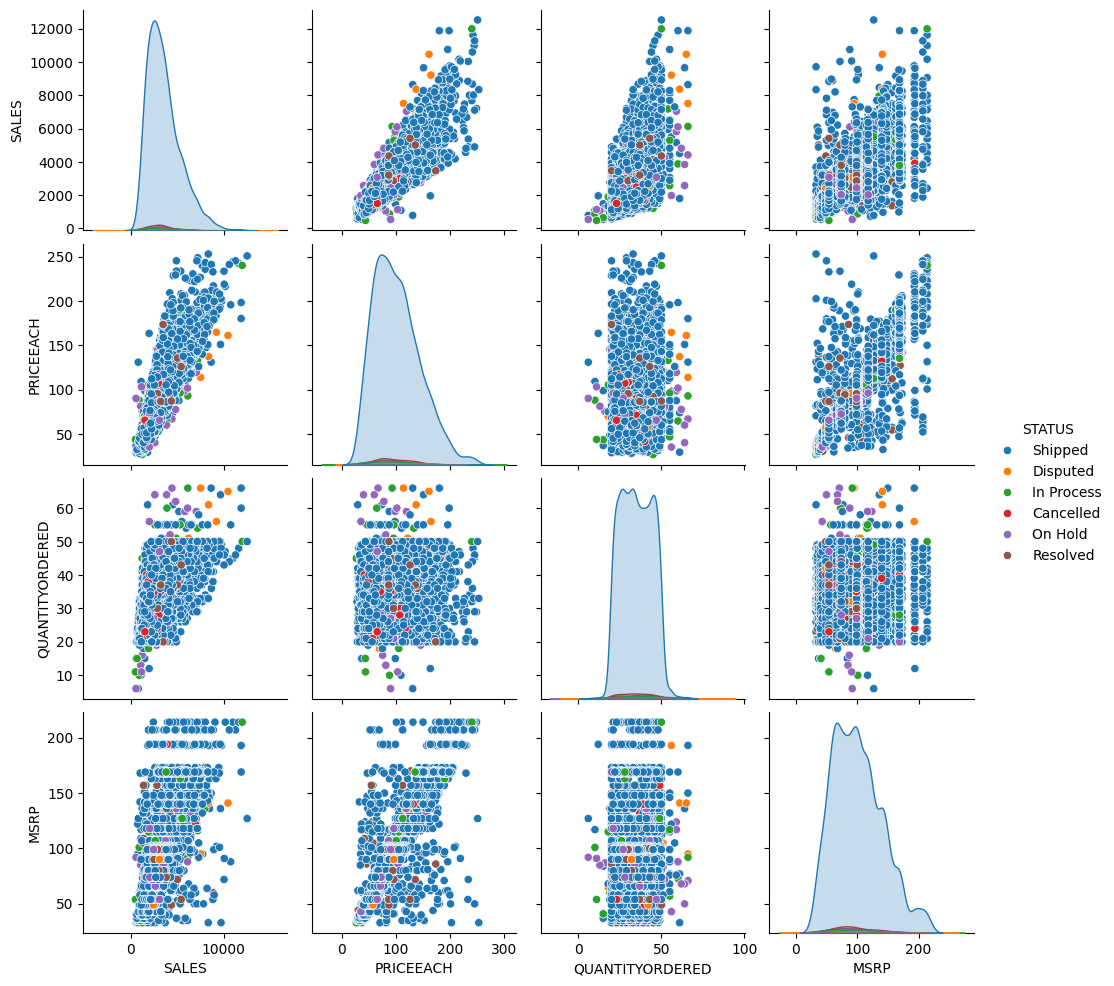

In [46]:
sns.pairplot(data_cleaned, hue='STATUS', vars=['SALES', 'PRICEEACH', 'QUANTITYORDERED', 'MSRP'])
plt.show()

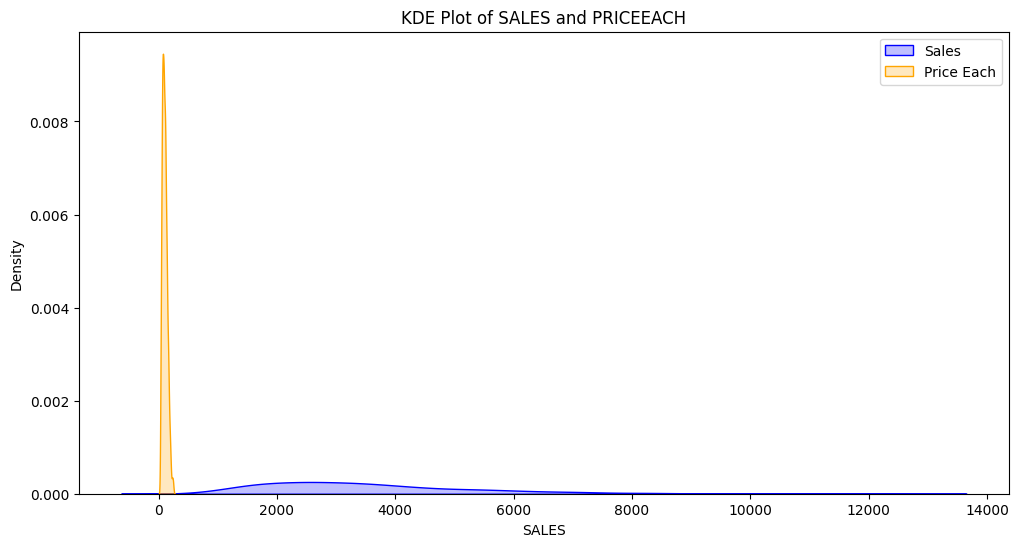

In [47]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data_cleaned['SALES'], color='blue', label='Sales', fill=True)
sns.kdeplot(data_cleaned['PRICEEACH'], color='orange', label='Price Each', fill=True)
plt.title('KDE Plot of SALES and PRICEEACH')
plt.legend()
plt.show()